In [1]:
#Import libraries 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

!pip install category_encoders 

from category_encoders import OneHotEncoder
#from sklearn.impute import SimpleImputer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.4 MB/s 


Prepare Data

In [4]:
#To create wrangle function

def wrangle(filepath) :

   #read csv file
   df = pd.read_csv(filepath)
 
   #Subset Data: To Detached Duplex in Lagos
   mask_state = df["state"] == "Lagos"
   mask_title = df["title"] == "Detached Duplex"
   df= df[mask_state & mask_title]
   
   #Drop Columns with high and low cardinality category values 
   df.drop(columns=["title", "state"], inplace=True)

   #Drop columns with multicollinearities
   df.drop(columns = ["bathrooms", "toilets"], inplace =True)

   #Removing outliers using price 
   low, high = df["price"].quantile([.1, .9])
   mask_price= df["price"].between(low, high)
   
   df = df[mask_price]
  
   return df

In [6]:
df = wrangle ("/content/drive/MyDrive/Project /nigeria_houses_data.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9672 entries, 2 to 24325
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       9672 non-null   float64
 1   parking_space  9672 non-null   float64
 2   town           9672 non-null   object 
 3   price          9672 non-null   float64
dtypes: float64(3), object(1)
memory usage: 377.8+ KB


Explore:

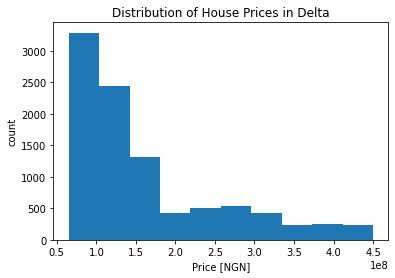

In [12]:

# to plot a histogram for distribution of house prices

plt.hist(df["price"])
plt.xlabel("Price [NGN]")
plt.ylabel("count")
plt.title("Distribution of House Prices in Delta")

plt.savefig("/content/drive/MyDrive/Project /hist-4.png", dpi=150);

In [13]:

#Statistics summary of the Dataset

df.describe()["price"].astype(int)

count         9672
mean     160993809
std       95082368
min       65000000
25%       90000000
50%      130000000
75%      200000000
max      450000000
Name: price, dtype: int64

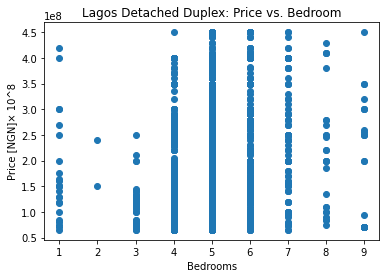

In [14]:

#scatter plot , Price v Bedroom 
plt.scatter(df["bedrooms"], df["price"])
plt.xlabel("Bedrooms")
plt.ylabel("Price [NGN]× 10^8")
plt.title ("Lagos Detached Duplex: Price vs. Bedroom")
plt.savefig("/content/drive/MyDrive/Project /scat-1.png", dpi=150);

''

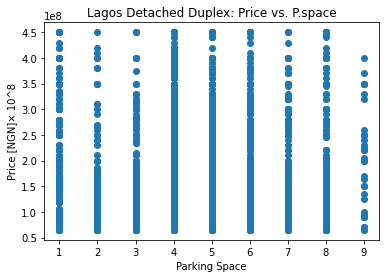

In [15]:

#scatter plot , Price v P.Space
plt.scatter(df["parking_space"], df["price"])
plt.xlabel("Parking Space")
plt.ylabel("Price [NGN]× 10^8")
plt.title ("Lagos Detached Duplex: Price vs. P.space")
;

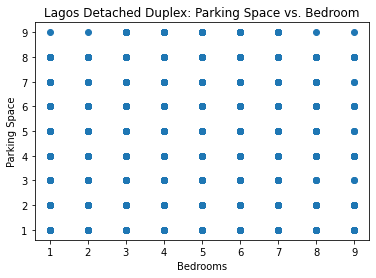

In [ ]:

#scatter plot , P. Space v Bedroom 
plt.scatter(df["bedrooms"], df["parking_space"])
plt.xlabel("Bedrooms")
plt.ylabel("Parking Space")
plt.title ("Lagos Detached Duplex: Parking Space vs. Bedroom");

In [ ]:
corr= df.select_dtypes("number").corr()

Split Data

In [16]:

#X_train = df.drop(columns="price")
X_train = df["town"]
y_train = df["price"]

Build Model

Baseline

In [17]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)

print (f"Mean Det_Dup Price : #{round(y_mean, 2)}")
print ("Baseline MAE: ", mean_absolute_error(y_train, y_pred_baseline).round(2))

Mean Det_Dup Price : #160993809.97
Baseline MAE:  74035302.7


Iteration

In [18]:
model = make_pipeline (
 OneHotEncoder(),
 Ridge(),
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['town'])),
                ('ridge', Ridge())])

Evaluation

In [19]:
y_train_pred = model.predict(X_train)

print ("Model mean: ", y_train_pred.mean())
print ("Model MAE: ", mean_absolute_error(y_train, y_train_pred).round(2))

Model mean:  160993809.9681555
Model MAE:  66032293.16
